<a href="https://colab.research.google.com/github/ElenaKapetanoudi/Machine-Learning-Exercises-4-5/blob/main/Exercises_4_%26_5_Semi_Supervised_Learning_%26_Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1860]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_absolute_error
from scipy.stats import ttest_ind
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from itertools import product
from sklearn.model_selection import GridSearchCV
from IPython.display import Markdown

# Part 1 - Semi Supervised Learning

## Question 1

### Load Dataset

In [1861]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Statistical Description

In [1862]:
df.describe(include = 'all')

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,NaN,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,NaN,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,NaN,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,NaN,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,NaN,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000


### Histograms

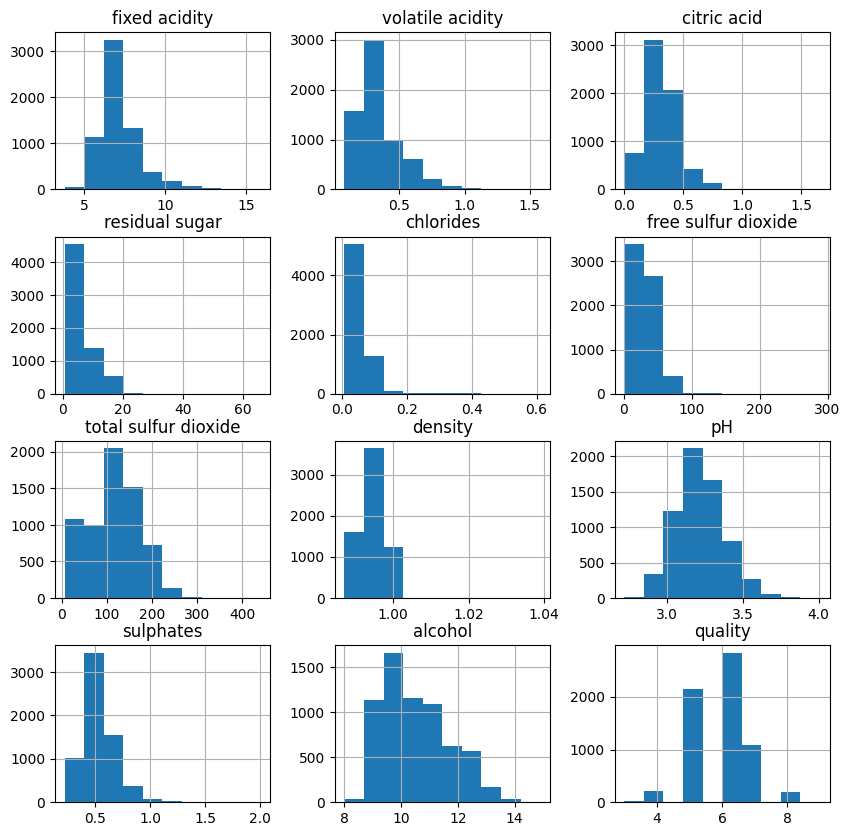

In [1863]:
df.hist(figsize=(10, 10))
plt.show()

### Type Bar Plot

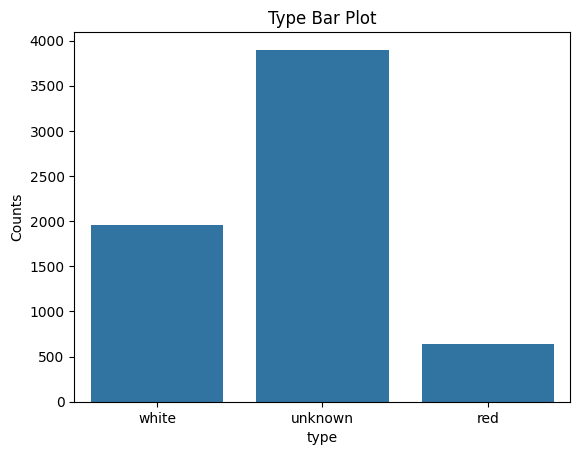

In [1864]:
sns.countplot(x='type', data=df)
plt.title('Type Bar Plot')
plt.ylabel('Counts')
plt.show()

## Question 2

### Type Mapping

In [1865]:
df['type'] = df['type'].map({'white': 0, 'red': 1, 'unknown': 2})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,2,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,2,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,2,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Numpy Arrays Creation

In [1866]:
input_df = df.drop(columns=['type'])
targets_df = df['type']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

## Question 3

### Numpy Arrays Separation

In [1867]:
x_known = x[y!=2]
y_known = y[y!=2]

x_unknown = x[y==2]

x_known.shape,y_known.shape,x_unknown.shape

((2599, 12), (2599,), (3898, 12))

## Question 4

### Known Train & Test Sets Split

In [1868]:
x_train_known, x_test_known, y_train_known, y_test_known = train_test_split(x_known, y_known, test_size=0.3, random_state=42, stratify=y_known)
x_train_known.shape, y_train_known.shape, x_test_known.shape, y_test_known.shape

((1819, 12), (1819,), (780, 12), (780,))

## Question 5

### Random Forest Training

In [1869]:
model = RandomForestClassifier(random_state=42)
model.fit(x_train_known, y_train_known)
model

RandomForestClassifier(random_state=42)

### Known Predictions Calculation

In [1870]:
train_known_prediction = model.predict(x_train_known)
test_known_prediction = model.predict(x_test_known)

### Known Train Set Metrics

In [1871]:
train_known_accuracy = accuracy_score(y_train_known, train_known_prediction)
train_known_f1_score = f1_score(y_train_known, train_known_prediction, average='weighted')
train_known_precision = precision_score(y_train_known, train_known_prediction, average='weighted')
train_known_recall = recall_score(y_train_known, train_known_prediction, average='weighted')

### Known Test Set Metrics

In [1872]:
test_known_accuracy = accuracy_score(y_test_known, test_known_prediction)
test_known_f1_score = f1_score(y_test_known, test_known_prediction, average='weighted')
test_known_precision = precision_score(y_test_known, test_known_prediction, average='weighted')
test_known_recall = recall_score(y_test_known, test_known_prediction, average='weighted')

### Known Metrics Dataframe

In [1873]:
known_metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Accuracy": [train_known_accuracy, test_known_accuracy],
    "F1-score": [train_known_f1_score, test_known_f1_score],
    "Precision": [train_known_precision, test_known_precision],
    "Recall": [train_known_recall, test_known_recall]
})

known_metrics_df

,Set,Accuracy,F1-score,Precision,Recall
0,Train,0.999450,0.999450,0.999451,0.999450
1,Test,0.998718,0.998719,0.998725,0.998718


### Observation

Στο σύνολο των δεδομένων μας παρατηρούμε ανισσοροπία στο χαρακτηριστικό type, καθώς τα δείγματα λευκού κρασιού είναι πολύ περισσότερα, σχεδόν τετραπλάσια,  από τα δείγματα κόκκινου κρασιού. Αυτό σημαίνει ότι η κλάση του λευκού κρασιού υπερεκπροσωπείται με αποτέλεσμα το μοντέλο να προβλέπει πιο πολύ τα δείγματα λευκού κρασιού (bias). Όταν, λοιπόν, θα τα βρίσκει σωστά τότε θα έχουμε παραπλανητική υψηλή ακριβεία. Αντίθετα, η μετρική F1 λαμβάνει υπόψη το precision και το recall, με αποτέλεσμα να έχει μία πιο ολοκληρωμένη εικόνα. Συνεπώς, σε περιπτώσεις ανισσοροπίας, όπως είναι και η δική μας, η μετρική F1 είναι καταλληλότερη της ακρίβειας.

## Question 6

### Balanced Random Forest Training

In [1874]:
model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
model_balanced.fit(x_train_known, y_train_known)
model_balanced

RandomForestClassifier(class_weight='balanced', random_state=42)

### Observation

Όταν η παράμετρος ορίζεται ως balanced τότε ο Ταξινομητής Τυχαίου Δάσους χρησιμοποιεί τις τιμές του y, στη δική μας περίπτωση τις τιμές του y_train_known, για να προσαρμόσει αυτόματα τα βάρη των κλάσεων αντιστρόφως ανάλογα με τις συχνότητες τους στα δεδομένα εισόδου με τον τύπο: n_samples / (n_classes * np.bincount(y)). Αυτό σημαίνει ότι η κλάση που υπερεκπροσωπείται θα έχει μικρότερο βάρος σε σχέση με την κλάση που υποεκπροσωπείται σε μία προσπάθεια να αντιμετωπιστεί η ανισσοροπία και να εξαλειφεί το bias που ευνοεί την πιο συχνή κλάση. Επομένως, η κλάση του κόκκινου κρασιού θα έχει μεγαλύτερο βάρος στον Ταξινομητή από την κλάση του λευκού κρασιού.

### Balanced Known Predictions Calculations

In [1875]:
train_known_balanced_prediction = model_balanced.predict(x_train_known)
test_known_balanced_prediction = model_balanced.predict(x_test_known)

### Balanced Known Train Set Metrics

In [1876]:
train_known_balanced_accuracy = accuracy_score(y_train_known, train_known_balanced_prediction)
train_known_balanced_f1_score = f1_score(y_train_known, train_known_balanced_prediction, average='weighted')
train_known_balanced_precision = precision_score(y_train_known, train_known_balanced_prediction, average='weighted')
train_known_balanced_recall = recall_score(y_train_known, train_known_balanced_prediction, average='weighted')

### Balanced Known Test Sets Metrics

In [1877]:
test_known_balanced_accuracy = accuracy_score(y_test_known, test_known_balanced_prediction)
test_known_balanced_f1_score = f1_score(y_test_known, test_known_balanced_prediction, average='weighted')
test_known_balanced_precision = precision_score(y_test_known, test_known_balanced_prediction, average='weighted')
test_known_balanced_recall = recall_score(y_test_known, test_known_balanced_prediction, average='weighted')

### Balanced Known Metrics Dataframe

In [1878]:
known_balanced_metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Accuracy": [train_known_balanced_accuracy, test_known_balanced_accuracy],
    "F1-score": [train_known_balanced_f1_score, test_known_balanced_f1_score],
    "Precision": [train_known_balanced_precision, test_known_balanced_precision],
    "Recall": [train_known_balanced_recall, test_known_balanced_recall]
})

known_balanced_metrics_df

,Set,Accuracy,F1-score,Precision,Recall
0,Train,0.999450,0.999450,0.999451,0.999450
1,Test,0.994872,0.994863,0.994871,0.994872


## Question 7

### Unknown Probalities Calculation

In [1879]:
y_unknown_proba=model_balanced.predict_proba(x_unknown)

y_unknown_proba_df = pd.DataFrame({
    "proba_white": y_unknown_proba[:, 0],
    "proba_red": y_unknown_proba[:, 1]
})

y_unknown_proba_df

,proba_white,proba_red
0,1.00,0.00
1,1.00,0.00
2,1.00,0.00
3,1.00,0.00
4,1.00,0.00
...,...,...
3893,0.22,0.78
3894,0.07,0.93
3895,0.01,0.99
3896,0.01,0.99


## Question 8

### Probability Labeling

In [1880]:
x_unknown_labeled = []
y_unknown_labeled = []

for i, row in y_unknown_proba_df.iterrows():
    if row.proba_red > 0.65:
        x_unknown_labeled.append(x_unknown[i])
        y_unknown_labeled.append("red")
    elif row.proba_red < 0.35:
        x_unknown_labeled.append(x_unknown[i])
        y_unknown_labeled.append("white")

x_unknown_labeled_df = pd.DataFrame(x_unknown_labeled)
y_unknown_labeled = pd.Series(y_unknown_labeled)

x_unknown_labeled_df.shape, y_unknown_labeled.shape

((3847, 12), (3847,))

## Question 9

### Type Mapping & Unknown Renewal

In [1881]:
y_unknown_labeled = y_unknown_labeled.map({'white': 0, 'red': 1})

x_unknown = np.array([
    x_unknown[i]
    for i in range(len(x_unknown))
    if i not in x_unknown_labeled_df.index
])

### Train Set Concatenation

In [1882]:
x_train_known = pd.concat([pd.DataFrame(x_train_known), x_unknown_labeled_df], axis=0).reset_index(drop=True)
y_train_known = pd.concat([pd.Series(y_train_known), y_unknown_labeled], axis=0).reset_index(drop=True)


x_train_known.shape, y_train_known.shape

((5666, 12), (5666,))

### Balanced Random Forest Training

In [1883]:
model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
model_balanced.fit(x_train_known, y_train_known)
model_balanced

RandomForestClassifier(class_weight='balanced', random_state=42)

### Balanced Known Prediction Calculation

In [1884]:
train_known_balanced_prediction = model_balanced.predict(x_train_known)
test_known_balanced_prediction = model_balanced.predict(x_test_known)

### Balanced Known Train & Test Sets Accuracy

In [1885]:
train_known_balanced_accuracy = accuracy_score(y_train_known, train_known_balanced_prediction)
test_known_balanced_accuracy = accuracy_score(y_test_known, test_known_balanced_prediction)
known_balanced_accuracy_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Accuracy": [train_known_balanced_accuracy, test_known_balanced_accuracy],
})

known_balanced_accuracy_df

,Set,Accuracy
0,Train,0.999824
1,Test,0.994872


### Balanced Known Train & Test Set Metrics

In [1886]:
# Balanced Known Train Set Metrics
train_known_balanced_accuracy = accuracy_score(y_train_known, train_known_balanced_prediction)
train_known_balanced_f1_score = f1_score(y_train_known, train_known_balanced_prediction, average='weighted')
train_known_balanced_precision = precision_score(y_train_known, train_known_balanced_prediction, average='weighted')
train_known_balanced_recall = recall_score(y_train_known, train_known_balanced_prediction, average='weighted')

# Balanced Known Test Set Metrics
test_known_balanced_accuracy = accuracy_score(y_test_known, test_known_balanced_prediction)
test_known_balanced_f1_score = f1_score(y_test_known, test_known_balanced_prediction, average='weighted')
test_known_balanced_precision = precision_score(y_test_known, test_known_balanced_prediction, average='weighted')
test_known_balanced_recall = recall_score(y_test_known, test_known_balanced_prediction, average='weighted')

# Balanced Known Metrics Dataframe
known_balanced_metrics_df = pd.DataFrame({
    "Set": ["Train", "Test"],
    "Accuracy": [train_known_balanced_accuracy, test_known_balanced_accuracy],
    "F1-score": [train_known_balanced_f1_score, test_known_balanced_f1_score],
    "Precision": [train_known_balanced_precision, test_known_balanced_precision],
    "Recall": [train_known_balanced_recall, test_known_balanced_recall]
})

known_balanced_metrics_df

,Set,Accuracy,F1-score,Precision,Recall
0,Train,0.999824,0.999824,0.999824,0.999824
1,Test,0.994872,0.994863,0.994871,0.994872


## Question 10

### Repetition Until No More Unknown with High Confidence

In [1887]:
times = 1
while True:

    if len(x_unknown) == 0:
        break

    # Unknown Probabilities Calculation
    y_unknown_proba=model_balanced.predict_proba(x_unknown)

    y_unknown_proba_df = pd.DataFrame({
        "proba_white": y_unknown_proba[:, 0],
        "proba_red": y_unknown_proba[:, 1]
    })

    # Probability Labeling
    x_unknown_labeled = []
    y_unknown_labeled = []

    for i, row in y_unknown_proba_df.iterrows():
        if row.proba_red > 0.65:
            x_unknown_labeled.append(x_unknown[i])
            y_unknown_labeled.append("red")
        elif row.proba_red < 0.35:
            x_unknown_labeled.append(x_unknown[i])
            y_unknown_labeled.append("white")

    x_unknown_labeled_df = pd.DataFrame(x_unknown_labeled)
    y_unknown_labeled = pd.Series(y_unknown_labeled)

    x_unknown_labeled_df.shape, y_unknown_labeled.shape

    # Unknown With High Confidence Check
    if(len(x_unknown_labeled_df) == 0):
      break

    times += 1

    # Type Mapping & Unknown Renewal
    y_unknown_labeled = y_unknown_labeled.map({'white': 0, 'red': 1})

    x_unknown = np.array([
        x_unknown[i]
        for i in range(len(x_unknown))
        if i not in x_unknown_labeled_df.index
    ])
    # Train Set Concatenation

    x_train_known = pd.concat([x_train_known, x_unknown_labeled_df], axis=0).reset_index(drop=True)
    y_train_known = pd.concat([y_train_known, y_unknown_labeled], axis=0).reset_index(drop=True)
    print(x_train_known.shape, y_train_known.shape)

    # Balanced Random Forest Training
    model_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
    model_balanced.fit(x_train_known, y_train_known)

    # Balanced Known Predictions
    train_known_balanced_prediction = model_balanced.predict(x_train_known)
    test_known_balanced_prediction = model_balanced.predict(x_test_known)

    # Balanced Known Train Set Metrics
    train_known_balanced_accuracy = accuracy_score(y_train_known, train_known_balanced_prediction)
    train_known_balanced_f1_score = f1_score(y_train_known, train_known_balanced_prediction, average='weighted')
    train_known_balanced_precision = precision_score(y_train_known, train_known_balanced_prediction, average='weighted')
    train_known_balanced_recall = recall_score(y_train_known, train_known_balanced_prediction, average='weighted')

    # Balanced Known Test Set Metrics
    test_known_balanced_accuracy = accuracy_score(y_test_known, test_known_balanced_prediction)
    test_known_balanced_f1_score = f1_score(y_test_known, test_known_balanced_prediction, average='weighted')
    test_known_balanced_precision = precision_score(y_test_known, test_known_balanced_prediction, average='weighted')
    test_known_balanced_recall = recall_score(y_test_known, test_known_balanced_prediction, average='weighted')

    # Balanced Known Metrics Dataframe
    known_balanced_metrics_df = pd.DataFrame({
        "Set": ["Train", "Test"],
        "Accuracy": [train_known_balanced_accuracy, test_known_balanced_accuracy],
        "F1-score": [train_known_balanced_f1_score, test_known_balanced_f1_score],
        "Precision": [train_known_balanced_precision, test_known_balanced_precision],
        "Recall": [train_known_balanced_recall, test_known_balanced_recall]
    })

    print(known_balanced_metrics_df)
print(times)

(5716, 12) (5716,)
     Set  Accuracy  F1-score  Precision    Recall
0  Train  0.999825  0.999825   0.999825  0.999825
1   Test  0.996154  0.996150   0.996151  0.996154
(5717, 12) (5717,)
     Set  Accuracy  F1-score  Precision    Recall
0  Train  0.999825  0.999825   0.999825  0.999825
1   Test  0.996154  0.996144   0.996173  0.996154
3


# Part 2 - Model Evaluation

## Question 1

### Load Dataset

In [1888]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Quality Bar Plot

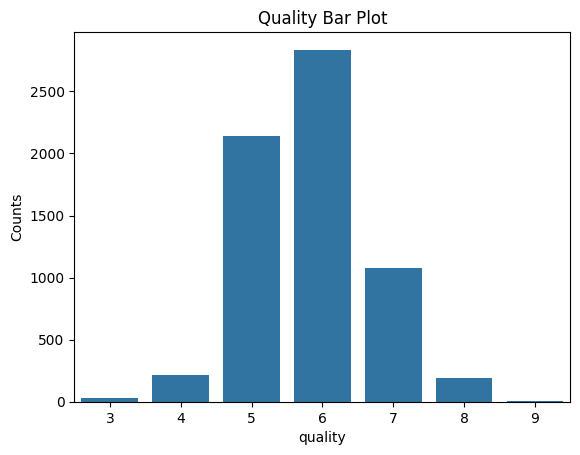

In [1889]:
sns.countplot(x='quality', data=df)
plt.title('Quality Bar Plot')
plt.ylabel('Counts')
plt.show()

### Observation

Σύμφωνα με το γράφημα, παρατηρούμε ότι οι κλάσεις του χαρακτηριστικού quality παρουσιάζουν ανισσοροπία, καθώς τα περισσότερα δείγματα έχουν τιμές 6 και 5, ενώ στις υπόλοιπες κλάσεις τα δείγματα είναι πολύ λιγότερα, τουλάχιστον κατά εκατοντάδες και μερικές φορές χιλιάδες. Γνωρίζουμε ότι, ένα ισορροπημένο χαρακτηριστικό εμφανίζει περίπου ίδιο αριθμό δειγμάτων σε κάθε κλάση, σε αντίθεση με τη δική μας περίπτωση. Συνεπώς, δεν θεωρούμε το quality ισορροπημένο (balanced) χαρακτηριστικό και, έτσι ώστε το μοντέλο να μην προβλέπει πιο συχνά τις συχνότερες κλάσεις (bias), θα χρειαστεί να εφαρμοστεί κάποια τεχνική εξισσορόπησης των κλάσεων ή μέθοδος ημι-επιβλεπόμενης μάθησης.

## Question 2

### Quality Mean For Each Type

In [1890]:
df.groupby("type")["quality"].mean()

,quality
type,
red,5.636023
white,5.877909


### Quality For Each Type Boxplot

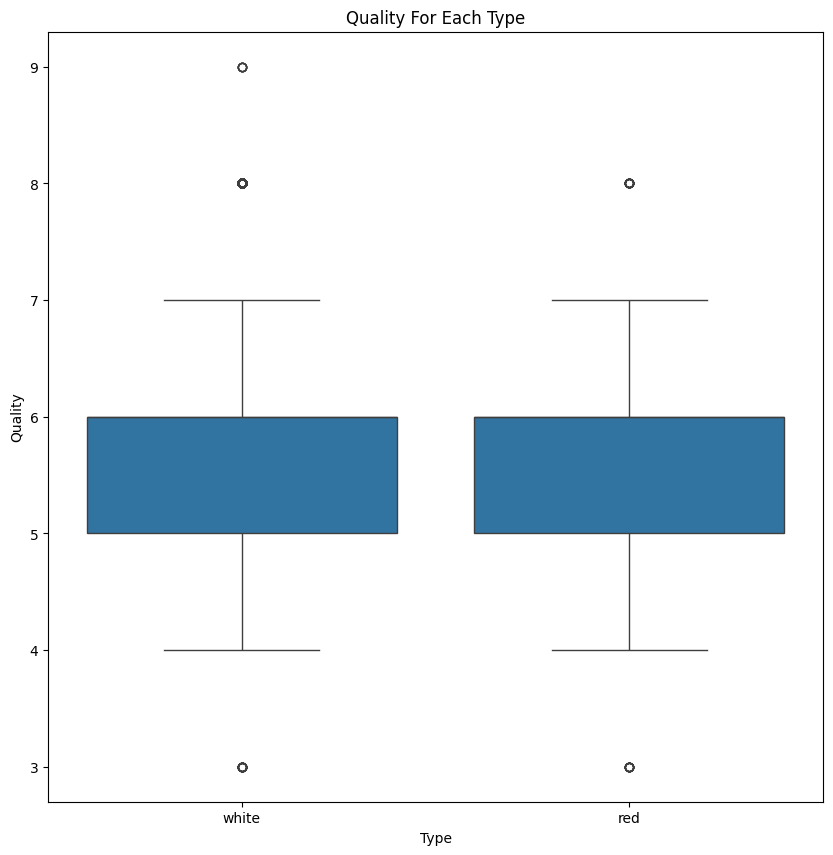

In [1891]:
plt.figure(figsize=(10,10))
sns.boxplot(x="type", y="quality", data=df)
plt.title("Quality For Each Type")
plt.xlabel("Type")
plt.ylabel("Quality")
plt.show()

### Quality Difference Independent T-Test

In [1892]:
white_quality = df[df["type"] == "white"]["quality"]
red_quality = df[df["type"] == "red"]["quality"]

t_statistic, p_value = ttest_ind(white_quality, red_quality, equal_var=False)

if p_value < 0.05:
  print(f'P_Value is {p_value:.4f} < 0.05, so the difference between qualities is statistically important and the type of wine has an impact on the quality.')
else:
  print(f'P_Value is {p_value:.4f} > 0.05, so the diffenence between qualities is not statistically important and the type of wine does not have an impact on the quality.')

P_Value is 0.0000 < 0.05, so the difference between qualities is statistically important and the type of wine has an impact on the quality.


### Observation

Για να εξετάσουμε ποιος τύπος κρασιού είναι ποιοτικά καλύτερος, το κόκκινο ή το λευκό, υπολογίσαμε, αρχικά, τον μέσο όρο της ποιότητας για καθένα από αυτούς. Το λευκό κρασί φαίνεται να παρουσιάζει ελαφρώς καλύτερο μέσο όρο ποιότητας από το κόκκινο κρασί, με 5.88 και 5.64 αντιστοίχως. Έπειτα, οπτικοποιήσαμε την ποιότητα των δύο τύπων ούτως ώστε να δούμε αν υπάρχει μεγάλη διαφορά στη διακύμανση και το εύρος των τιμών και διαπιστώσαμε ότι η κατανομή της ποιότητας είναι σχεδόν ίδια στα δύο είδη κρασιού, με εξαίρεση ότι το λευκό κρασί μπορεί να πάρει και λίγο υψηλότερη τιμή από ότι μπορεί το κόκκινο, δηλαδή 9 αντί για 8. Αυτό σημαίνει ότι τα λευκά κρασιά, σε μερικές περιπτώσεις, περιλαμβάνουν δείγματα καλύτερης ποιότητας συγκριτικά με τα κόκκινα κρασιά. Τέλος, για να ελέγξουμε αν οι δύο τύποι κρασιού έχουν πραγματικά διαφορετικό μέσο όρο, χωρίς αυτό να είναι τυχαίο, εφαρμόσαμε την μέθοδο t-test ανεξάρτητων δειγμάτων που επιστρέφει δύο τιμές:
* το t-statistic, που δείχνει πόσο μεγάλη είναι η διαφορά των μέσων σε σχέση με τη διασπορά
* το p-value, που δείχνει αν αυτή η διαφορά είναι αρκετά σημαντική ώστε να πούμε ότι ο ένας τύπος εμφανίζει καλύτερη ποιότητα από τον άλλον ή όχι.

Συμπεραίνουμε ότι, επειδή:
* ο μέσος όρος ποιότητας του λευκού κρασιού είναι μεγαλύτερος από αυτόν του κόκκινου κρασιού
* η κατανομή τους είναι ίδια με μερικές φορές το λευκό κρασί να έχει δείγματα μεγαλύτερης ποιότητας και
* το p_value που προέκυψε από το t-test είναι μικρότερο του 0.05, που σημαίνει ότι η διαφορά του μέσου όρου είναι αρκετά σημαντική,

τότε το λευκό κρασί παρουσιάζει καλύτερη ποιότητα από το κόκκινο.



## Question 3

### Quality Mean Calculation Based On Dry & Sweet

In [1893]:
dry = df[df['residual sugar'] <= 12]
sweet = df[df['residual sugar'] > 12]

dry_quality_mean = dry['quality'].mean()
sweet_quality_mean = sweet['quality'].mean()

print(f'Dry Quality Mean: {dry_quality_mean:.4f}')
print(f'Sweet Quality Mean: {sweet_quality_mean:.4f}')

Dry Quality Mean: 5.8267
Sweet Quality Mean: 5.7602


### Quality For Dry & Sweet Boxplot

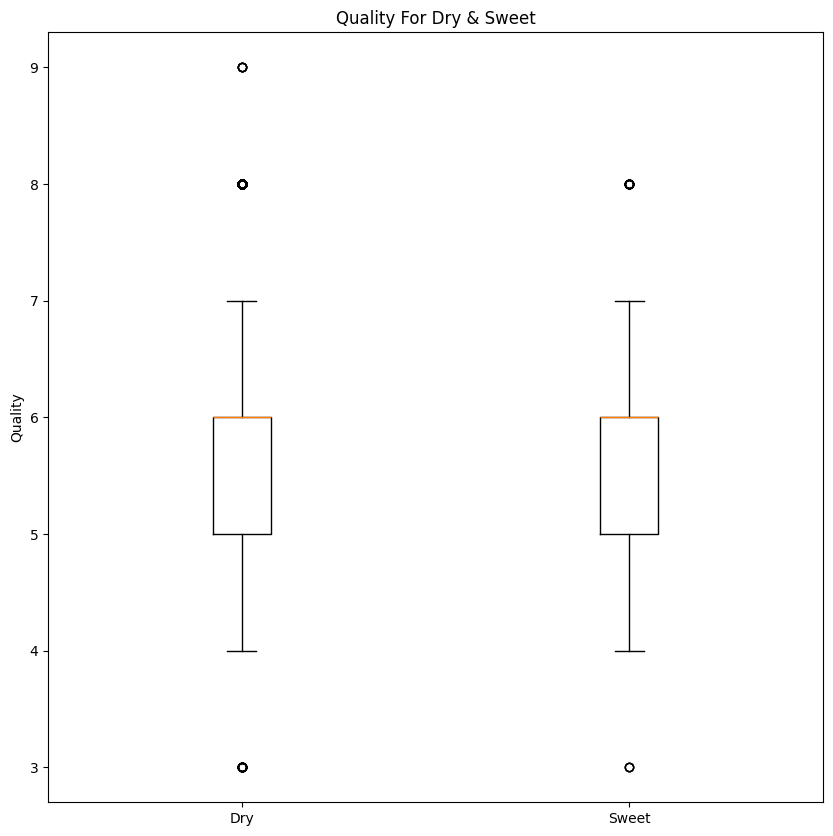

In [1894]:
plt.figure(figsize=(10,10))
plt.boxplot([dry['quality'], sweet['quality']], tick_labels=['Dry', 'Sweet'])
plt.title("Quality For Dry & Sweet")
plt.ylabel("Quality")
plt.show()

### Quality Difference Independent T-Test

In [1895]:
dry_quality = df[df["residual sugar"] <= 12]["quality"]
sweet_quality = df[df["residual sugar"] > 12]["quality"]

t_statistic, p_value = ttest_ind(dry_quality, sweet_quality, equal_var=False)

if p_value < 0.05:
  print(f'P_Value is {p_value:.4f} < 0.05, so the difference between qualities is statistically important and the residual sugar of wine has an impact on the quality.')
else:
  print(f'P_Value is {p_value:.4f} > 0.05, so the diffenence between qualities is not statistically important and the residual sugar of wine does not have an impact on the quality.')

P_Value is 0.0290 < 0.05, so the difference between qualities is statistically important and the residual sugar of wine has an impact on the quality.


### Observation

Για να εξετάσουμε αν η ποσότητα των υπολοιπόμενων σακχάρων έχει σημασία για την ποιότητα και το ξηρό ή το γλυκό κρασί έχει μεγαλύτερη ποιότητα, υπολογίσαμε, αρχικά, τον μέσο όρο της ποιότητας για ξηρό και γλυκό κρασί. Το ξηρό κρασί φαίνεται να παρουσιάζει ελαφρώς καλύτερο μέσο όρο ποιότητας από το γλυκό κρασί, με 5.83 και 5.76 αντιστοίχως. Έπειτα, οπτικοποιήσαμε την ποιότητα τους ούτως ώστε να δούμε αν υπάρχει μεγάλη διαφορά στη διακύμανση και το εύρος των τιμών και διαπιστώσαμε ότι η κατανομή της ποιότητας είναι σχεδόν ίδια στα δύο είδη κρασιού, με εξαίρεση ότι το ξηρό κρασί μπορεί να πάρει και λίγο υψηλότερη τιμή από ότι μπορεί το γλυκό, δηλαδή 9 αντί για 8. Αυτό σημαίνει ότι τα ξηρά κρασιά, σε μερικές περιπτώσεις, περιλαμβάνουν δείγματα καλύτερης ποιότητας συγκριτικά με τα γλυκά κρασιά. Τέλος, για να ελέγξουμε αν το ξηρό και το γλυκό κρασί έχουν πραγματικά διαφορετικό μέσο όρο, χωρίς αυτό να είναι τυχαίο, εφαρμόσαμε την μέθοδο t-test ανεξάρτητων δειγμάτων που επιστρέφει δύο τιμές:
* το t-statistic, που δείχνει πόσο μεγάλη είναι η διαφορά των μέσων σε σχέση με τη διασπορά
* το p-value, που δείχνει αν αυτή η διαφορά είναι αρκετά σημαντική ώστε να πούμε ότι το ένα από τα δύο εμφανίζει καλύτερη ποιότητα.

Συμπεραίνουμε ότι, επειδή:
* ο μέσος όρος ποιότητας του ξηρού κρασιού είναι μεγαλύτερος από αυτόν του γλυκού κρασιού
* η κατανομή τους είναι ίδια με μερικές φορές το ξηρό κρασί να έχει δείγματα μεγαλύτερης ποιότητας και
* το p_value που προέκυψε από το t-test είναι 0,029 και επομένως μικρότερο του 0.05, που σημαίνει ότι η διαφορά του μέσου όρου είναι αρκετά σημαντική,

τότε το ξηρό κρασί παρουσιάζει μεγαλύτερη ποιότητα από το γλυκό.

## Question 4

### Type Mapping

In [1896]:
df['type'] = df['type'].map({'white': 0, 'red': 1})
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,1,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,1,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,1,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,1,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Numpy Arrays Creation

In [1897]:
input_df = df.drop(columns=['quality'])
targets_df = df['quality']

x = input_df.to_numpy()
y = targets_df.to_numpy()
x.shape, y.shape

((6497, 12), (6497,))

### Train & Test Sets Split

In [1898]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

## Question 5

### Decision Tree Regressor Training & Prediction

In [1899]:
model = DecisionTreeRegressor(random_state=0)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

### MAE Calculation

In [1900]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.44769230769230767

## Question 6

### Train & Test Sets Split, Decision Tree Regressor Training And MAE Calculation For Different Seeds

In [1901]:
mae_scores = []

for seed in range(10):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=seed)

    model = DecisionTreeRegressor(random_state=seed)
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)

    mae_scores.append(mean_absolute_error(y_test, y_pred))

### MAE Mean & Standard Deviation Calculation

In [1902]:
mae_scores_mean = np.mean(mae_scores)
mae_scores_std = np.std(mae_scores)

print(f'Mean MAE: {mae_scores_mean:.4f}')
print(f'Standard Deviation of MAE: {mae_scores_std:.4f}')

Mean MAE: 0.4622
Standard Deviation of MAE: 0.0252


### Observation

Γνωρίζουμε ότι αν η τυπική απόκλιση των MAE scores είναι μικρότερη του 0.05, τότε το μοντέλο μας είναι σταθερό, που σημαίνει ότι το σφάλμα θα είναι κοντά στον μέσο όρο των MAE scores. Αντίθετα, αν η τυπική απόκλιση είναι μεγαλύτερη τότε το μοντέλο μας είναι ασταθές και συνεπώς αναξιόπιστο. Επειδή, στο παράδειγμα μας, η τυπική απόκλιση είναι 0.025 < 0.05, τότε το μοντέλο μας είναι σταθερό και αξιόπιστο. Άρα, είμαστε βέβαιοι πως το σφάλμα θα είναι κοντά στον μέσο όρο που είναι 0.46.

## Question 7

### Train & Validation Set Splits

In [1903]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.2, random_state=0)
x_train.shape, x_validation.shape, y_train.shape, y_validation.shape

((4677, 12), (1170, 12), (4677,), (1170,))

### Sets Check

In [1904]:
if len(x_train) + len(x_validation) + len(x_test) == len(x):
  print('Check Passed')
  print(f'x_train length: {len(x_train)/len(x):.1f}/1')
  print(f'x_validation length: {len(x_validation)/len(x):.1f}/1')
  print(f'x_test length: {len(x_test)/len(x):.1f}/1')
else:
  print('Check Failed')

Check Passed
x_train length: 0.7/1
x_validation length: 0.2/1
x_test length: 0.1/1


### Fine Tuning By Decision Tree Regressor Training & MAE Calculation For Different Parameters

In [1905]:
max_depth_list = [2, 4, 6, 8, 10]
min_samples_split_list = [3, 5, 7]

mae_results =[]

for max_depth, min_samples_split in product(max_depth_list, min_samples_split_list):
  model = DecisionTreeRegressor(
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      random_state=0
  )
  model.fit(x_train, y_train)

  y_pred_train = model.predict(x_train)
  y_pred_validation = model.predict(x_validation)

  mae_train = mean_absolute_error(y_train, y_pred_train)
  mae_validation = mean_absolute_error(y_validation, y_pred_validation)

  mae_results.append({
      'max_depth': max_depth,
      'min_samples_split': min_samples_split,
      'mae_train': mae_train,
      'mae_validation': mae_validation
  })

mae_results = pd.DataFrame(mae_results)
mae_results


,max_depth,min_samples_split,mae_train,mae_validation
0,2,3,0.590631,0.611638
1,2,5,0.590631,0.611638
2,2,7,0.590631,0.611638
3,4,3,0.562181,0.595632
4,4,5,0.562181,0.595632
5,4,7,0.562181,0.595632
6,6,3,0.521060,0.593127
7,6,5,0.523064,0.598212
8,6,7,0.523813,0.598212
9,8,3,0.455717,0.589901


## Question 8

### Observation

Γνωρίζουμε ότι το train set δεν μπορεί να είναι αξιόπιστο για την επιλογή υπερπαραμέτρων, αφού δίνει ένα μικρό σφάλμα το οποίο δεν είναι ρεαλιστικό. Αυτό συμβαίνει επειδή το train set γνωρίζει ήδη τα δεδομένα, εφόσον έχει εκπαιδευτεί με αυτά. Αντίθετα, το validation set θεωρείται πιο αξιόπιστο, καθώς δεν χρησιμοποιείται για τη  εκπαίδευση του μοντέλου με αποτέλεσμα το σφάλμα του να ανταποκρίνεται περισσότερο στην πραγματικότητα και να μας δείχνει πόσο καλά το μοντέλο γενικεύει σε άγνωστα δεδομένα. Τέλος, από το παράδειγμα μας παρατηρούμε ότι το σφάλμα του train set είναι πάντα μικρότερο από το σφάλμα του validation set, επομένως, το μοντέλο μας κάνει overfitting.

## Question 9

### Train & Test Sets Split

In [1906]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5847, 12), (650, 12), (5847,), (650,))

### Fine Tuning With Cross Validation

In [1907]:
parameters = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [3, 5, 7]
}


model = DecisionTreeRegressor(random_state=0)

grid = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring= 'neg_mean_absolute_error',
    n_jobs=-1,
    cv=10
)

grid.fit(x_train, y_train)

grid_df = pd.DataFrame(grid.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014332,0.000813,0.001496,0.000173,2,3,"{'max_depth': 2, 'min_samples_split': 3}",-0.601218,-0.595990,-0.622668,-0.619342,-0.591856,-0.574416,-0.630583,-0.572021,-0.598283,-0.611190,-0.601757,0.018552,13
1,0.014567,0.000508,0.001507,0.000201,2,5,"{'max_depth': 2, 'min_samples_split': 5}",-0.601218,-0.595990,-0.622668,-0.619342,-0.591856,-0.574416,-0.630583,-0.572021,-0.598283,-0.611190,-0.601757,0.018552,13
2,0.013986,0.001277,0.001401,0.000036,2,7,"{'max_depth': 2, 'min_samples_split': 7}",-0.601218,-0.595990,-0.622668,-0.619342,-0.591856,-0.574416,-0.630583,-0.572021,-0.598283,-0.611190,-0.601757,0.018552,13
3,0.024566,0.001111,0.001472,0.000103,4,3,"{'max_depth': 4, 'min_samples_split': 3}",-0.568885,-0.575780,-0.601908,-0.592955,-0.552735,-0.564000,-0.605466,-0.560487,-0.583566,-0.579789,-0.578557,0.016762,10
4,0.024880,0.001343,0.001455,0.000040,4,5,"{'max_depth': 4, 'min_samples_split': 5}",-0.568885,-0.575780,-0.601908,-0.592955,-0.552735,-0.564000,-0.605466,-0.560487,-0.583566,-0.579789,-0.578557,0.016762,10
5,0.024744,0.001128,0.001484,0.000082,4,7,"{'max_depth': 4, 'min_samples_split': 7}",-0.568885,-0.575780,-0.601908,-0.592955,-0.552735,-0.564000,-0.605466,-0.560487,-0.583566,-0.579789,-0.578557,0.016762,10
6,0.036395,0.000732,0.001790,0.000944,6,3,"{'max_depth': 6, 'min_samples_split': 3}",-0.559838,-0.549871,-0.590498,-0.579622,-0.550997,-0.529632,-0.590103,-0.546924,-0.577260,-0.569093,-0.564384,0.019201,8
7,0.039221,0.009104,0.001466,0.000063,6,5,"{'max_depth': 6, 'min_samples_split': 5}",-0.559838,-0.549871,-0.588789,-0.579622,-0.550997,-0.529632,-0.590103,-0.546924,-0.577260,-0.569093,-0.564213,0.018974,7
8,0.035792,0.000218,0.001450,0.000031,6,7,"{'max_depth': 6, 'min_samples_split': 7}",-0.559838,-0.549871,-0.589814,-0.579622,-0.550997,-0.530658,-0.590103,-0.546924,-0.577260,-0.569093,-0.564418,0.018924,9
9,0.049503,0.001354,0.001465,0.000031,8,3,"{'max_depth': 8, 'min_samples_split': 3}",-0.539967,-0.559430,-0.569348,-0.585539,-0.549101,-0.542386,-0.568466,-0.561770,-0.556709,-0.551463,-0.558418,0.013053,5


### Best Parameter Combination & MAE

In [1908]:
print(f'Best Parameter Combination: {grid.best_params_}')
print(f'Best MAE Score: {-grid.best_score_}')

Best Parameter Combination: {'max_depth': 10, 'min_samples_split': 3}
Best MAE Score: 0.5474530599282398


## Question 10

### Test MAE Calculation

In [1909]:
best_model = grid.best_estimator_

y_pred = best_model.predict(x_test)

test_mae = mean_absolute_error(y_test, y_pred)

print(f'Test MAE: {test_mae}')

Test MAE: 0.5283007924692908


### Observation

Η πιο αξιόπιστη μεθοδολογία είναι η 9, δηλαδή το Cross Validation, διότι το μοντέλο διαμορφώνεται από πολλά σενάρια και αξιολογείται σε διαφορετικά validation splits. Αυτό σημαίνει ότι το αποτέλεσμα είναι ένας μέσος όρος όλων αυτών και, συνεπώς, είναι σταθερό και αξιόπιστο. Επιπλέον, μειώνεται ο κίνδυνος overfitting στο validation set. Συμπερασματικά, η μεθοδολογία 9 υπερτερεί τις μεθοδολογίες 6 και 7, διότι κάνει καλύτερη γενίκευση.

## Question 11

### Cross Validation With Static Max Depth

In [1910]:
parameters = {
    'min_samples_split': [3, 5, 7]
}

model = DecisionTreeRegressor(random_state=0, max_depth=5)

grid = GridSearchCV(
    estimator=model,
    param_grid=parameters,
    scoring= 'neg_mean_absolute_error',
    n_jobs=-1,
    cv=10
)

grid.fit(x_train, y_train)

grid_df = pd.DataFrame(grid.cv_results_)
grid_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030757,0.001170,0.001456,0.000053,3,{'min_samples_split': 3},-0.561426,-0.555429,-0.586233,-0.565284,-0.552831,-0.546034,-0.595738,-0.550786,-0.57269,-0.581639,-0.566809,0.015853,1
1,0.030102,0.001272,0.001442,0.000042,5,{'min_samples_split': 5},-0.561426,-0.555429,-0.586233,-0.565284,-0.552831,-0.546034,-0.595738,-0.550786,-0.57269,-0.581639,-0.566809,0.015853,1
2,0.030683,0.001831,0.001456,0.000156,7,{'min_samples_split': 7},-0.561426,-0.555429,-0.586233,-0.565284,-0.552831,-0.546034,-0.595738,-0.550786,-0.57269,-0.581639,-0.566809,0.015853,1


### Best Parameter Combination & MAE

In [1911]:
print(f'Best Parameter Combination: {grid.best_params_}')
print(f'Best MAE Score: {-grid.best_score_}')

Best Parameter Combination: {'min_samples_split': 3}
Best MAE Score: 0.5668091119767175


### Best Tree

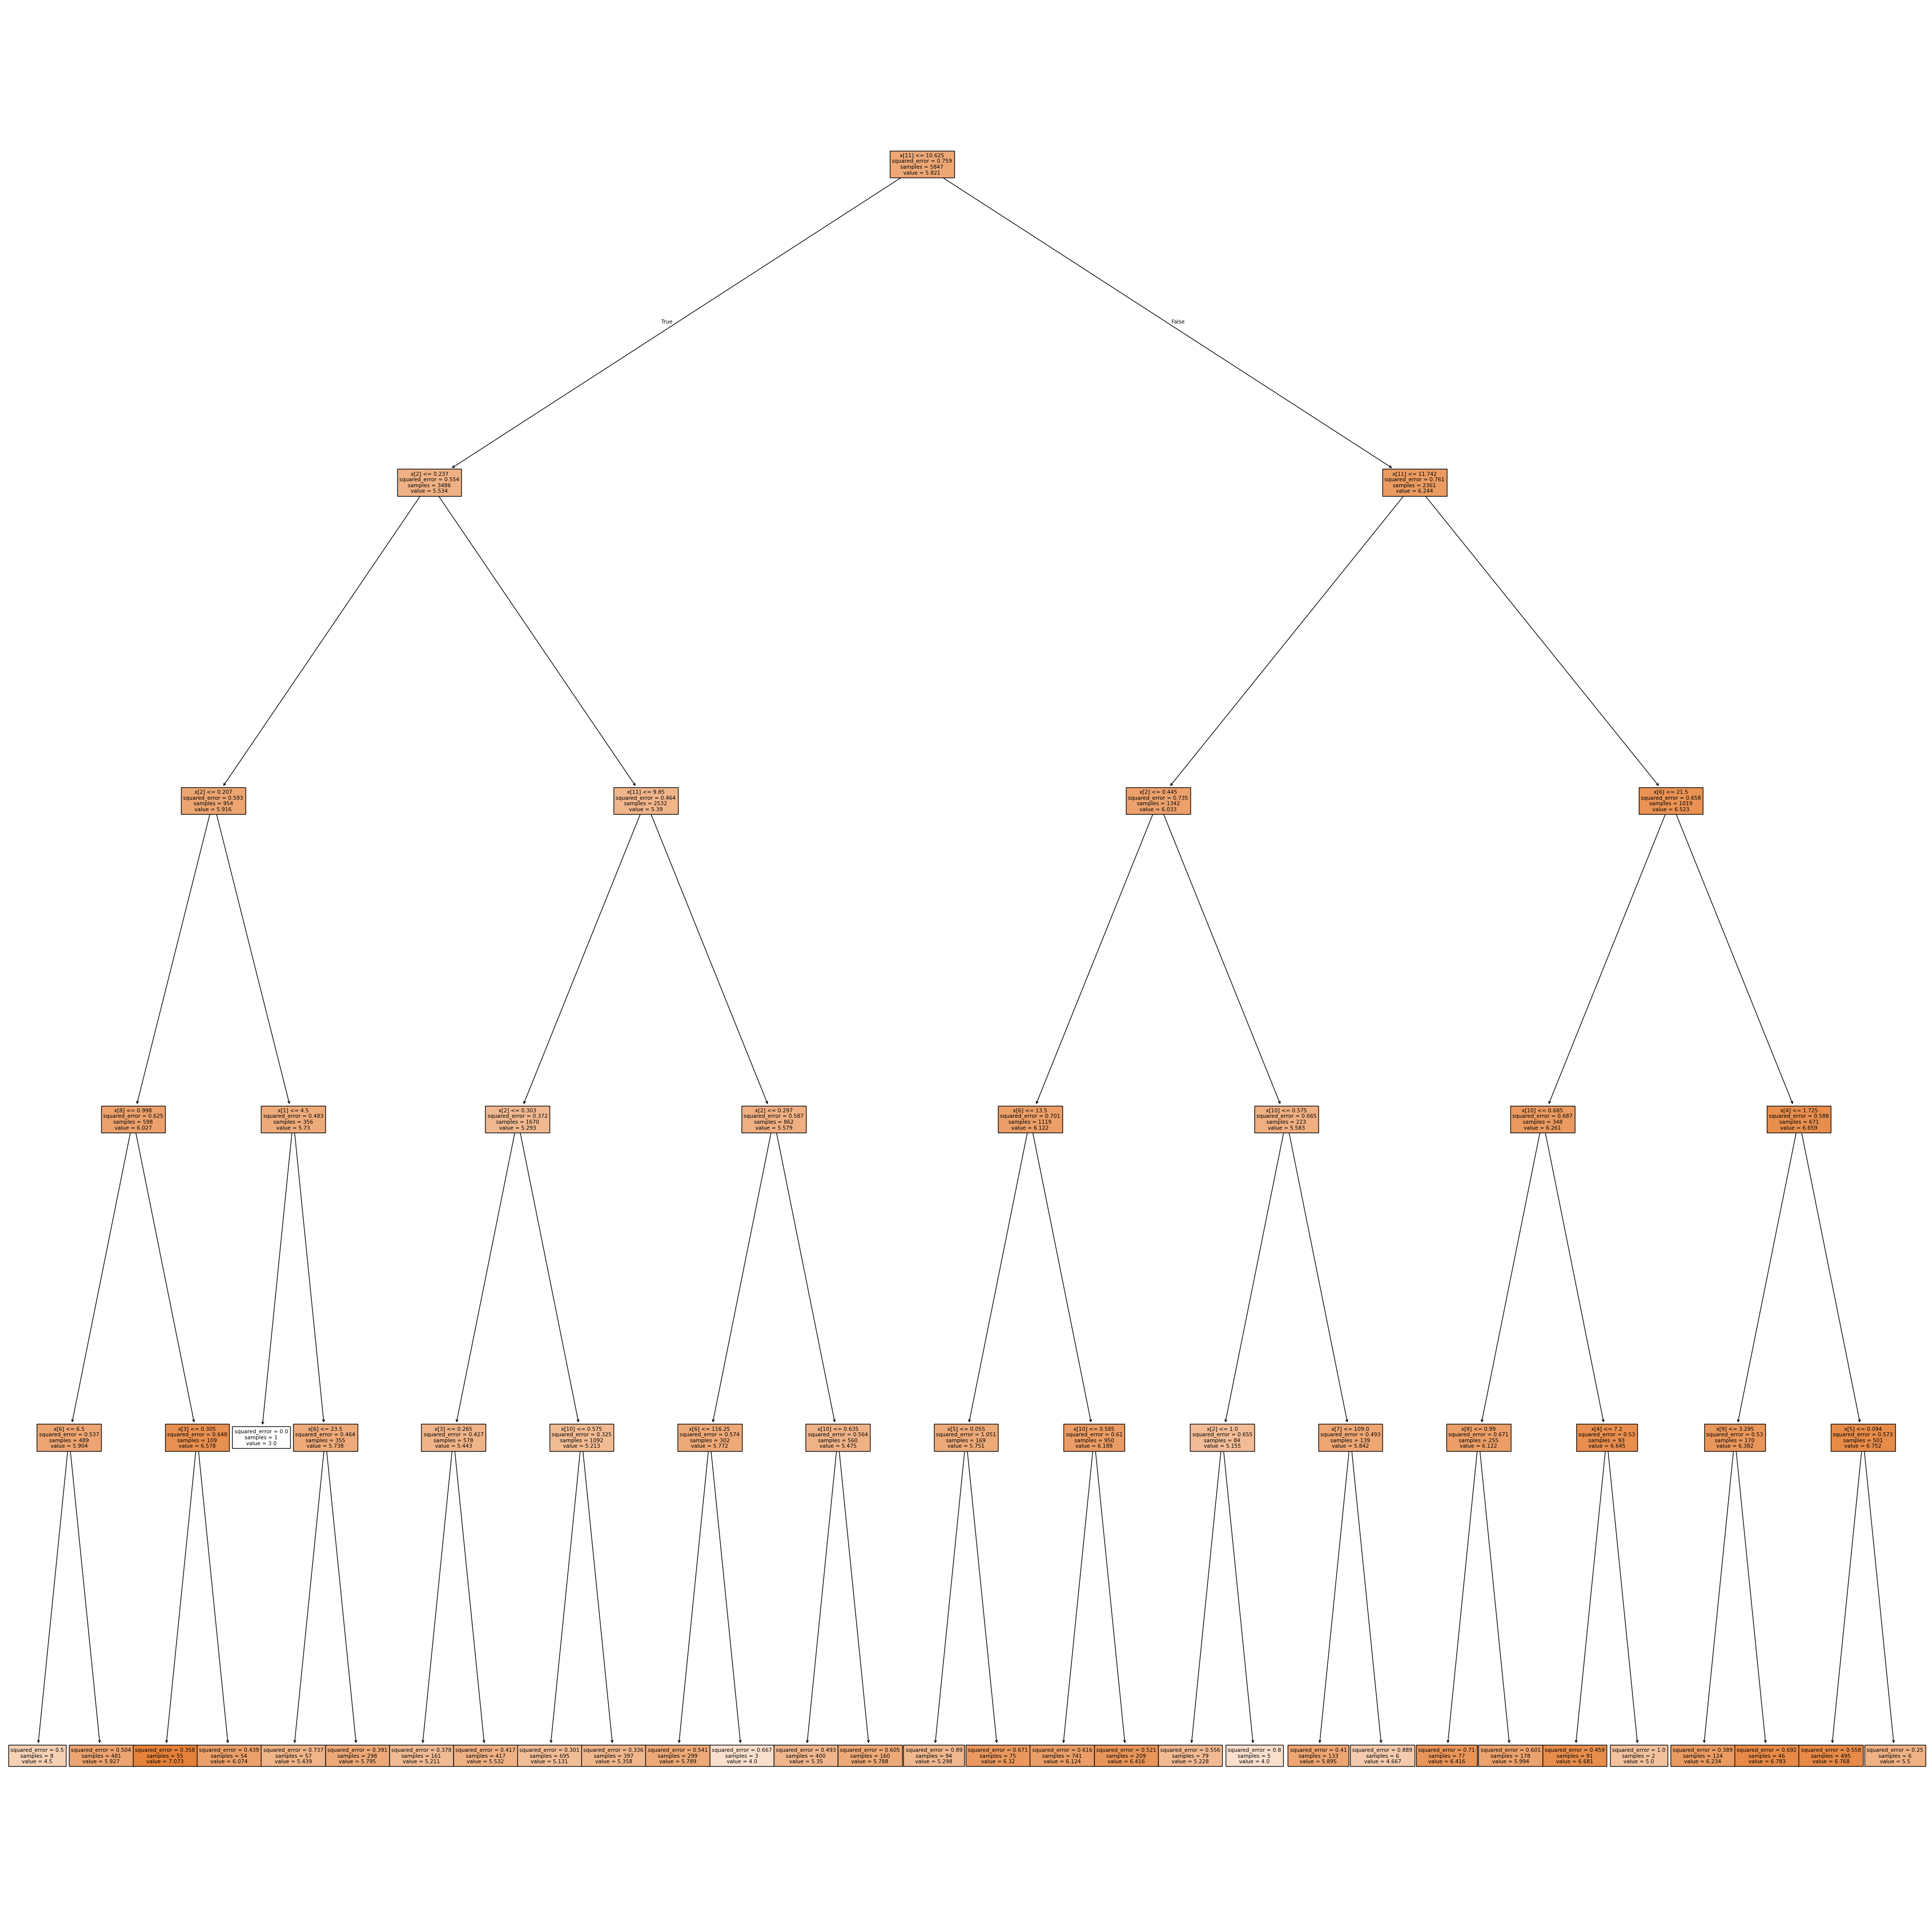

In [1912]:
best_model = grid.best_estimator_

plt.figure(figsize=(50,50))
plot_tree(best_model, filled=True)
plt.show()

### Best Tree Rules

In [1913]:
feature_names = df.drop(columns=['quality']).columns.tolist()

rules = export_text(best_model, feature_names=feature_names)

Markdown(f"```\n{rules}\n```")

```
|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 6.50
|   |   |   |   |   |--- value: [4.50]
|   |   |   |   |--- free sulfur dioxide >  6.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- fixed acidity <= 4.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- fixed acidity >  4.50
|   |   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |   |--- value: [5.44]
|   |   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |   |--- value: [5.80]
|   |--- volatile acidity >  0.24
|   |   |--- alcohol <= 9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- citric acid <= 0.27
|   |   |   |   |   |--- value: [5.21]
|   |   |   |   |--- citric acid >  0.27
|   |   |   |   |   |--- value: [5.53]
|   |   |   |--- volatile acidity >  0.30
|   |   |   |   |--- sulphates <= 0.57
|   |   |   |   |   |--- value: [5.13]
|   |   |   |   |--- sulphates >  0.57
|   |   |   |   |   |--- value: [5.36]
|   |   |--- alcohol >  9.85
|   |   |   |--- volatile acidity <= 0.30
|   |   |   |   |--- free sulfur dioxide <= 116.25
|   |   |   |   |   |--- value: [5.79]
|   |   |   |   |--- free sulfur dioxide >  116.25
|   |   |   |   |   |--- value: [4.00]
|   |   |   |--- volatile acidity >  0.30
|   |   |   |   |--- sulphates <= 0.63
|   |   |   |   |   |--- value: [5.35]
|   |   |   |   |--- sulphates >  0.63
|   |   |   |   |   |--- value: [5.79]
|--- alcohol >  10.62
|   |--- alcohol <= 11.74
|   |   |--- volatile acidity <= 0.44
|   |   |   |--- free sulfur dioxide <= 13.50
|   |   |   |   |--- chlorides <= 0.05
|   |   |   |   |   |--- value: [5.30]
|   |   |   |   |--- chlorides >  0.05
|   |   |   |   |   |--- value: [6.32]
|   |   |   |--- free sulfur dioxide >  13.50
|   |   |   |   |--- sulphates <= 0.58
|   |   |   |   |   |--- value: [6.12]
|   |   |   |   |--- sulphates >  0.58
|   |   |   |   |   |--- value: [6.42]
|   |   |--- volatile acidity >  0.44
|   |   |   |--- sulphates <= 0.57
|   |   |   |   |--- volatile acidity <= 1.00
|   |   |   |   |   |--- value: [5.23]
|   |   |   |   |--- volatile acidity >  1.00
|   |   |   |   |   |--- value: [4.00]
|   |   |   |--- sulphates >  0.57
|   |   |   |   |--- total sulfur dioxide <= 109.00
|   |   |   |   |   |--- value: [5.89]
|   |   |   |   |--- total sulfur dioxide >  109.00
|   |   |   |   |   |--- value: [4.67]
|   |--- alcohol >  11.74
|   |   |--- free sulfur dioxide <= 21.50
|   |   |   |--- sulphates <= 0.69
|   |   |   |   |--- density <= 0.99
|   |   |   |   |   |--- value: [6.42]
|   |   |   |   |--- density >  0.99
|   |   |   |   |   |--- value: [5.99]
|   |   |   |--- sulphates >  0.69
|   |   |   |   |--- residual sugar <= 7.20
|   |   |   |   |   |--- value: [6.68]
|   |   |   |   |--- residual sugar >  7.20
|   |   |   |   |   |--- value: [5.00]
|   |   |--- free sulfur dioxide >  21.50
|   |   |   |--- residual sugar <= 1.73
|   |   |   |   |--- pH <= 3.29
|   |   |   |   |   |--- value: [6.23]
|   |   |   |   |--- pH >  3.29
|   |   |   |   |   |--- value: [6.78]
|   |   |   |--- residual sugar >  1.73
|   |   |   |   |--- chlorides <= 0.09
|   |   |   |   |   |--- value: [6.77]
|   |   |   |   |--- chlorides >  0.09
|   |   |   |   |   |--- value: [5.50]

```

### Observation

Σύμφωνα με τους παραπάνω κανόνες του δέντρου, παρατηρούμε ότι το κρασί έχει υψηλότερο σκορ όταν:
*  έχει υψηλό alcohol > 11.74, τότε η ποιότητα του κρασιού είναι πάνω από το 5.5, ανεξάρτητα τα υπόλοιπα χαρακτηριστικά
*   έχει χαμηλό volatile acidity  <= 1
*   έχει χαμηλό density
*   έχει υψηλά sulphates
*   έχει χαμηλό residual sugar
*   έχει μέτρια chlorides


### Feature By Importance Bar Plot

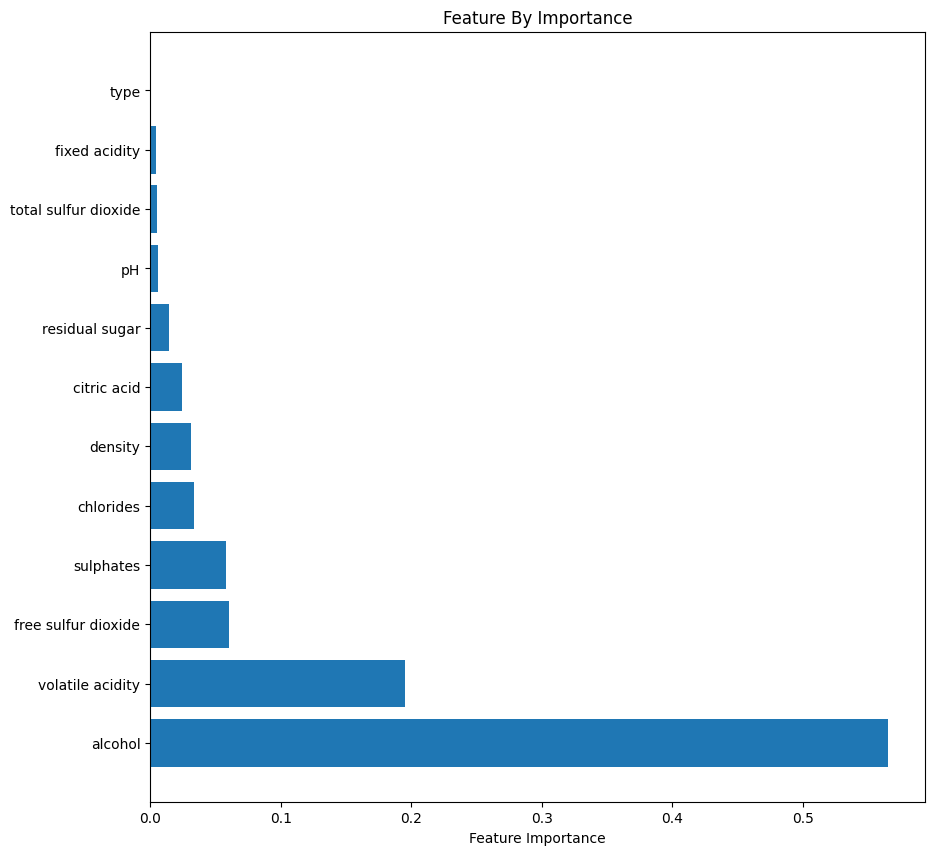

In [1914]:
feature_importances = best_model.feature_importances_
features = df.columns.drop('quality')

indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[indices]
sorted_features = features[indices]

plt.figure(figsize=(10, 10))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature By Importance')
plt.show()